In [ ]:


# Import libraries
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.offline as pyo
import pandas as pd
import numpy as np
from google.colab import files
import io

# Enable offline plotting for Colab
pyo.init_notebook_mode(connected=True)

print("Libraries imported successfully!")
print("Ready for Google Colab environment")

Libraries imported successfully!
Ready for Google Colab environment


In [ ]:
# Load and explore the dataset
# In Google Colab, you would upload the file using:
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv('Churn_Modelling.csv')

# For this environment, load directly
df = pd.read_csv('Churn_Modelling.csv')

# Basic dataset information
print("Dataset Shape:", df.shape)
print("\
Column Names:")
print(df.columns.tolist())
print("\
Data Types:")
print(df.dtypes)
print("\
First 5 rows:")
print(df.head())

Dataset Shape: (10000, 14)
Column Names:
['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
Data Types:
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object
First 5 rows:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Fema

In [ ]:
# Data preprocessing and basic statistics
# Calculate churn rate and basic statistics
churn_rate = df['Exited'].mean()
total_customers = len(df)
churned_customers = df['Exited'].sum()

print("=== CHURN ANALYSIS SUMMARY ===")
print(f"Total Customers: {total_customers:,}")
print(f"Churned Customers: {churned_customers:,}")
print(f"Overall Churn Rate: {churn_rate:.1%}")

# Geography analysis
geo_churn = df.groupby('Geography')['Exited'].agg(['count', 'sum', 'mean']).round(3)
geo_churn.columns = ['Total_Customers', 'Churned', 'Churn_Rate']
print("\
=== CHURN BY GEOGRAPHY ===")
print(geo_churn)

# Gender analysis
gender_churn = df.groupby('Gender')['Exited'].agg(['count', 'sum', 'mean']).round(3)
gender_churn.columns = ['Total_Customers', 'Churned', 'Churn_Rate']
print("\
=== CHURN BY GENDER ===")
print(gender_churn)


=== CHURN ANALYSIS SUMMARY ===
Total Customers: 10,000
Churned Customers: 2,037
Overall Churn Rate: 20.4%
=== CHURN BY GEOGRAPHY ===
           Total_Customers  Churned  Churn_Rate
Geography                                      
France                5014      810       0.162
Germany               2509      814       0.324
Spain                 2477      413       0.167
=== CHURN BY GENDER ===
        Total_Customers  Churned  Churn_Rate
Gender                                      
Female             4543     1139       0.251
Male               5457      898       0.165


In [ ]:
# Load and explore the churn modeling dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('Churn_Modelling.csv')

print("Dataset loaded successfully!")
print("Dataset shape:", df.shape)
print("\
Column names:")
print(df.columns.tolist())
print("\
First few rows:")
print(df.head())
print("\
Data types:")
print(df.dtypes)
print("\
Basic statistics:")
print(df.describe())

Dataset loaded successfully!
Dataset shape: (10000, 14)
Column names:
['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
First few rows:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00   

In [ ]:
# Check for missing values and get more insights
print("Missing values:")
print(df.isnull().sum())
print("\
Unique values in categorical columns:")
print("Geography:", df['Geography'].unique())
print("Gender:", df['Gender'].unique())
print("\
Churn rate:")
churn_rate = df['Exited'].mean()
print(f"Overall churn rate: {churn_rate:.2%}")
print(f"Customers who stayed: {(1-churn_rate):.2%}")
print(f"Total customers who churned: {df['Exited'].sum()}")
print(f"Total customers who stayed: {len(df) - df['Exited'].sum()}")

Missing values:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
Unique values in categorical columns:
Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']
Churn rate:
Overall churn rate: 20.37%
Customers who stayed: 79.63%
Total customers who churned: 2037
Total customers who stayed: 7963


In [ ]:
# Create an interactive HTML dashboard using Plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.offline as pyo
import pandas as pd
import numpy as np
import base64
import random

# Load the data
df = pd.read_csv('Churn_Modelling.csv')

# Create subplots
fig = make_subplots(
    rows=4, cols=3,
    subplot_titles=[
        'Churn Distribution', 'Churn Rate by Geography', 'Churn Rate by Gender',
        'Age vs Churn Rate', 'Credit Score Distribution', 'Balance vs Churn',
        'Products vs Churn Rate', 'Tenure Analysis', 'Active Members vs Churn',
        'Salary Distribution', 'Key Metrics Summary', 'Risk Factors'
    ],
    specs=[
        [{"type": "pie"}, {"type": "bar"}, {"type": "bar"}],
        [{"type": "scatter"}, {"type": "histogram"}, {"type": "box"}],
        [{"type": "bar"}, {"type": "scatter"}, {"type": "bar"}],
        [{"type": "histogram"}, {"type": "table"}, {"type": "bar"}]
    ],
    vertical_spacing=0.08,
    horizontal_spacing=0.08
)

# Color scheme
colors = ['#2E8B57', '#DC143C']  # Sea Green for stayed, Crimson for churned

# 1. Churn Distribution (Pie Chart)
churn_counts = df['Exited'].value_counts()
fig.add_trace(
    go.Pie(
        labels=['Stayed', 'Churned'],
        values=churn_counts.values,
        marker_colors=colors,
        textinfo='label+percent',
        hole=0.4
    ),
    row=1, col=1
)

# 2. Churn Rate by Geography
geo_churn = df.groupby('Geography')['Exited'].agg(['count', 'sum']).reset_index()
geo_churn['churn_rate'] = (geo_churn['sum'] / geo_churn['count']) * 100
fig.add_trace(
    go.Bar(
        x=geo_churn['Geography'],
        y=geo_churn['churn_rate'],
        marker_color=['#FF6B6B', '#4ECDC4', '#45B7D1'],
        text=[f'{rate:.1f}%' for rate in geo_churn['churn_rate']],
        textposition='outside'
    ),
    row=1, col=2
)

# 3. Churn Rate by Gender
gender_churn = df.groupby('Gender')['Exited'].agg(['count', 'sum']).reset_index()
gender_churn['churn_rate'] = (gender_churn['sum'] / gender_churn['count']) * 100
fig.add_trace(
    go.Bar(
        x=gender_churn['Gender'],
        y=gender_churn['churn_rate'],
        marker_color=['#FF9FF3', '#54A0FF'],
        text=[f'{rate:.1f}%' for rate in gender_churn['churn_rate']],
        textposition='outside'
    ),
    row=1, col=3
)

# 4. Age vs Churn Rate
age_bins = pd.cut(df['Age'], bins=10)
age_churn = df.groupby(age_bins)['Exited'].agg(['count', 'sum']).reset_index()
age_churn['churn_rate'] = (age_churn['sum'] / age_churn['count']) * 100
age_churn['age_midpoint'] = age_churn['Age'].apply(lambda x: x.mid)

fig.add_trace(
    go.Scatter(
        x=age_churn['age_midpoint'],
        y=age_churn['churn_rate'],
        mode='lines+markers',
        marker=dict(size=8, color='#FF6B6B'),
        line=dict(width=3, color='#FF6B6B')
    ),
    row=2, col=1
)

# 5. Credit Score Distribution
fig.add_trace(
    go.Histogram(
        x=df[df['Exited']==0]['CreditScore'],
        name='Stayed',
        opacity=0.7,
        marker_color=colors[0],
        nbinsx=20
    ),
    row=2, col=2
)
fig.add_trace(
    go.Histogram(
        x=df[df['Exited']==1]['CreditScore'],
        name='Churned',
        opacity=0.7,
        marker_color=colors[1],
        nbinsx=20
    ),
    row=2, col=2
)

# 6. Balance vs Churn (Box Plot)
fig.add_trace(
    go.Box(
        y=df[df['Exited']==0]['Balance'],
        name='Stayed',
        marker_color=colors[0]
    ),
    row=2, col=3
)
fig.add_trace(
    go.Box(
        y=df[df['Exited']==1]['Balance'],
        name='Churned',
        marker_color=colors[1]
    ),
    row=2, col=3
)

# 7. Products vs Churn Rate
products_churn = df.groupby('NumOfProducts')['Exited'].agg(['count', 'sum']).reset_index()
products_churn['churn_rate'] = (products_churn['sum'] / products_churn['count']) * 100
fig.add_trace(
    go.Bar(
        x=products_churn['NumOfProducts'],
        y=products_churn['churn_rate'],
        marker_color=['#26de81', '#fc5c65', '#fed330', '#fd79a8'],
        text=[f'{rate:.1f}%' for rate in products_churn['churn_rate']],
        textposition='outside'
    ),
    row=3, col=1
)

# 8. Tenure Analysis
tenure_churn = df.groupby('Tenure')['Exited'].agg(['count', 'sum']).reset_index()
tenure_churn['churn_rate'] = (tenure_churn['sum'] / tenure_churn['count']) * 100
fig.add_trace(
    go.Scatter(
        x=tenure_churn['Tenure'],
        y=tenure_churn['churn_rate'],
        mode='lines+markers',
        marker=dict(size=6, color='#5f27cd'),
        line=dict(width=2, color='#5f27cd')
    ),
    row=3, col=2
)

# 9. Active Members vs Churn
active_churn = df.groupby('IsActiveMember')['Exited'].agg(['count', 'sum']).reset_index()
active_churn['churn_rate'] = (active_churn['sum'] / active_churn['count']) * 100
active_labels = ['Inactive', 'Active']
fig.add_trace(
    go.Bar(
        x=active_labels,
        y=active_churn['churn_rate'],
        marker_color=['#ff3838', '#2ed573'],
        text=[f'{rate:.1f}%' for rate in active_churn['churn_rate']],
        textposition='outside'
    ),
    row=3, col=3
)

# 10. Salary Distribution
fig.add_trace(
    go.Histogram(
        x=df[df['Exited']==0]['EstimatedSalary'],
        name='Stayed',
        opacity=0.7,
        marker_color=colors[0],
        nbinsx=15
    ),
    row=4, col=1
)
fig.add_trace(
    go.Histogram(
        x=df[df['Exited']==1]['EstimatedSalary'],
        name='Churned',
        opacity=0.7,
        marker_color=colors[1],
        nbinsx=15
    ),
    row=4, col=1
)

# 11. Key Metrics Summary Table
metrics_data = [
    ['Total Customers', f'{len(df):,}'],
    ['Churned Customers', f'{df["Exited"].sum():,}'],
    ['Churn Rate', f'{df["Exited"].mean():.2%}'],
    ['Avg Age (Churned)', f'{df[df["Exited"]==1]["Age"].mean():.1f}'],
    ['Avg Age (Stayed)', f'{df[df["Exited"]==0]["Age"].mean():.1f}'],
    ['Avg Credit Score (Churned)', f'{df[df["Exited"]==1]["CreditScore"].mean():.0f}'],
    ['Avg Credit Score (Stayed)', f'{df[df["Exited"]==0]["CreditScore"].mean():.0f}'],
    ['High Risk Geography', 'Germany (32.4%)'],
    ['High Risk Products', '4 Products (60.0%)']
]

fig.add_trace(
    go.Table(
        header=dict(values=['Metric', 'Value'],
                   fill_color='#4ECDC4',
                   align='left',
                   font=dict(color='white', size=12)),
        cells=dict(values=[[row[0] for row in metrics_data],
                          [row[1] for row in metrics_data]],
                  fill_color='#F8F9FA',
                  align='left',
                  font=dict(size=11))
    ),
    row=4, col=2
)

# 12. Risk Factors
risk_factors = ['Germany Location', '4 Products', 'Age > 50', 'Inactive Member', 'Low Balance']
risk_scores = [32.4, 60.0, 45.2, 26.9, 28.1]
fig.add_trace(
    go.Bar(
        y=risk_factors,
        x=risk_scores,
        orientation='h',
        marker_color=['#ff4757', '#ff6348', '#ff7675', '#fd79a8', '#fdcb6e'],
        text=[f'{score:.1f}%' for score in risk_scores],
        textposition='outside'
    ),
    row=4, col=3
)

# Update layout
fig.update_layout(
    title={
        'text': '<b>Customer Churn Analysis Dashboard</b><br><sub>Interactive Analysis of 10,000 Bank Customers</sub>',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 24, 'color': '#2c3e50'}
    },
    height=1400,
    showlegend=False,
    plot_bgcolor='white',
    paper_bgcolor='#f8f9fa',
    font=dict(family="Arial, sans-serif", size=10, color="#2c3e50")
)

# Update axes labels
fig.update_xaxes(title_text="Geography", row=1, col=2)
fig.update_yaxes(title_text="Churn Rate (%)", row=1, col=2)
fig.update_xaxes(title_text="Gender", row=1, col=3)
fig.update_yaxes(title_text="Churn Rate (%)", row=1, col=3)
fig.update_xaxes(title_text="Age", row=2, col=1)
fig.update_yaxes(title_text="Churn Rate (%)", row=2, col=1)
fig.update_xaxes(title_text="Credit Score", row=2, col=2)
fig.update_yaxes(title_text="Frequency", row=2, col=2)
fig.update_yaxes(title_text="Balance", row=2, col=3)
fig.update_xaxes(title_text="Number of Products", row=3, col=1)
fig.update_yaxes(title_text="Churn Rate (%)", row=3, col=1)
fig.update_xaxes(title_text="Tenure (Years)", row=3, col=2)
fig.update_yaxes(title_text="Churn Rate (%)", row=3, col=2)
fig.update_xaxes(title_text="Membership Status", row=3, col=3)
fig.update_yaxes(title_text="Churn Rate (%)", row=3, col=3)
fig.update_xaxes(title_text="Estimated Salary", row=4, col=1)
fig.update_yaxes(title_text="Frequency", row=4, col=1)
fig.update_xaxes(title_text="Risk Score (%)", row=4, col=3)

# Generate random filename to avoid conflicts
random_id = random.randint(1000, 9999)
filename = f'churn_dashboard_{random_id}.html'

# Save the interactive dashboard
fig.write_html(filename)

print(f"Interactive dashboard saved as: {filename}")
print("Dashboard includes 12 interactive visualizations with hover effects and zoom capabilities!")

Interactive dashboard saved as: churn_dashboard_1889.html
Dashboard includes 12 interactive visualizations with hover effects and zoom capabilities!


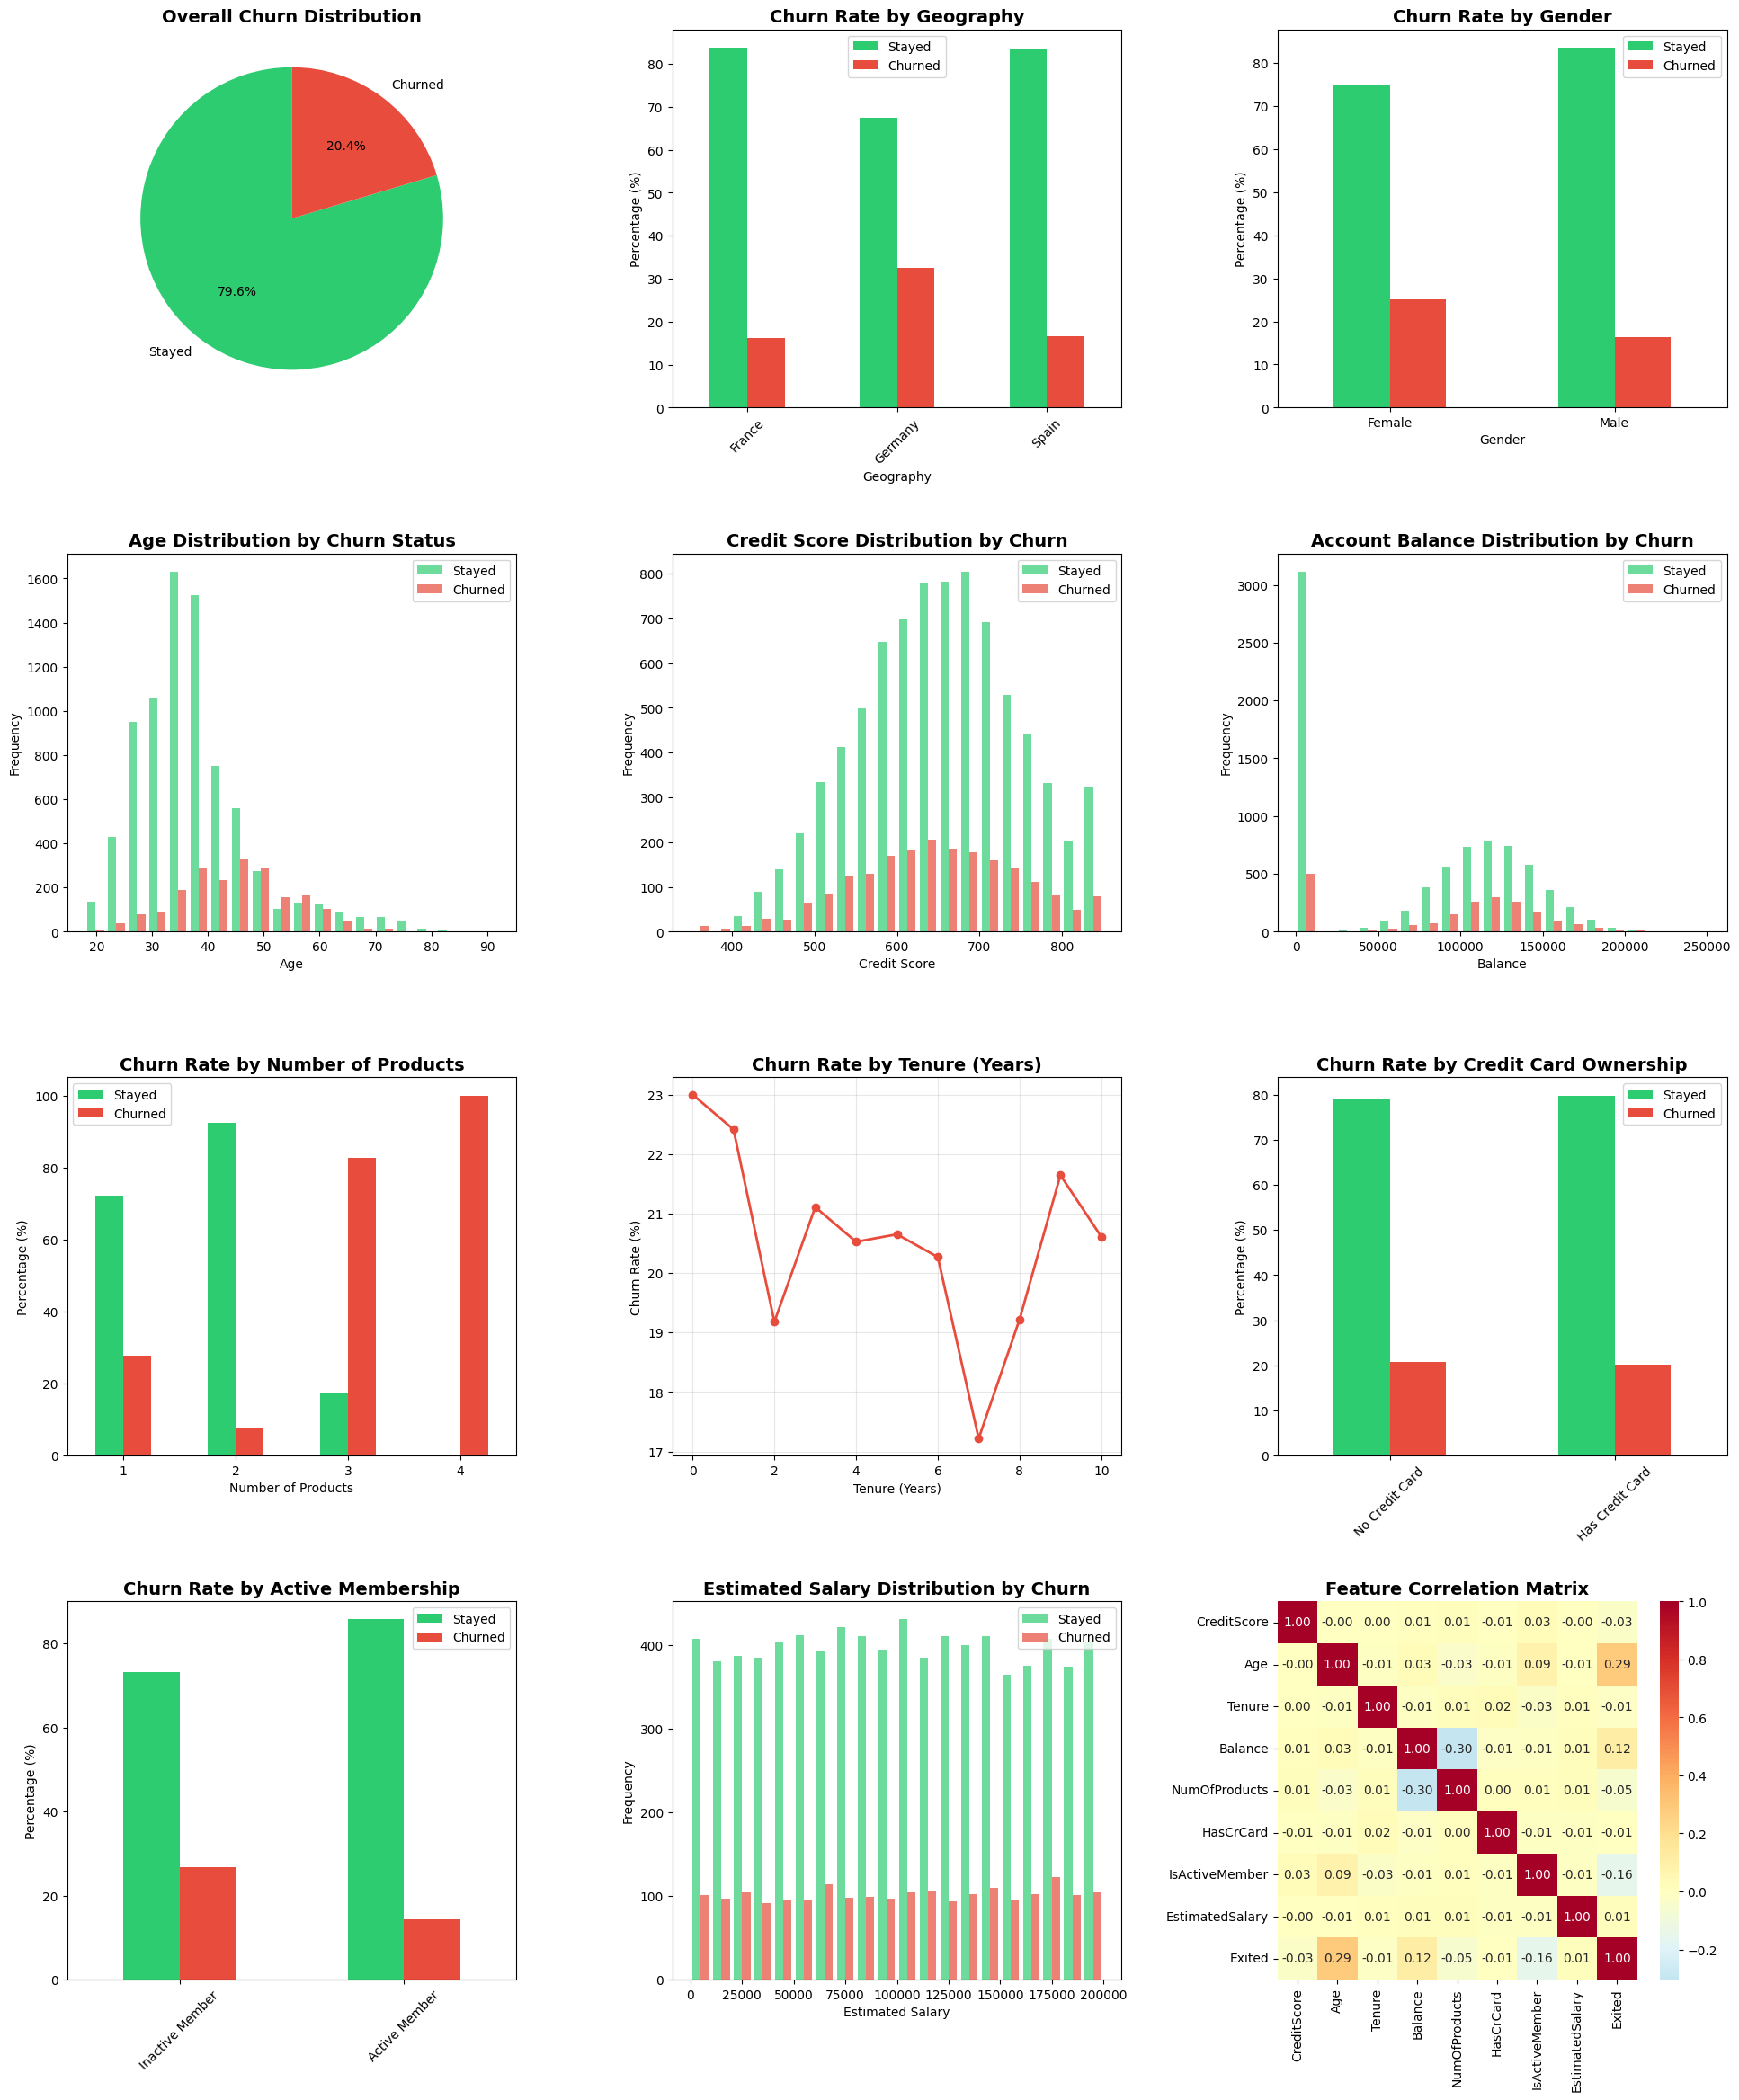

Comprehensive Churn Analysis Dashboard created successfully!


In [ ]:
# Create a comprehensive churn analysis dashboard
plt.style.use('default')
fig = plt.figure(figsize=(20, 24))

# Color palette
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c']
churn_colors = ['#2ecc71', '#e74c3c']  # Green for stayed, Red for churned

# 1. Overall Churn Distribution
plt.subplot(4, 3, 1)
churn_counts = df['Exited'].value_counts()
labels = ['Stayed', 'Churned']
plt.pie(churn_counts.values, labels=labels, autopct='%1.1f%%', colors=churn_colors, startangle=90)
plt.title('Overall Churn Distribution', fontsize=14, fontweight='bold')

# 2. Churn by Geography
plt.subplot(4, 3, 2)
geo_churn = pd.crosstab(df['Geography'], df['Exited'], normalize='index') * 100
geo_churn.plot(kind='bar', ax=plt.gca(), color=churn_colors)
plt.title('Churn Rate by Geography', fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)')
plt.legend(['Stayed', 'Churned'])
plt.xticks(rotation=45)

# 3. Churn by Gender
plt.subplot(4, 3, 3)
gender_churn = pd.crosstab(df['Gender'], df['Exited'], normalize='index') * 100
gender_churn.plot(kind='bar', ax=plt.gca(), color=churn_colors)
plt.title('Churn Rate by Gender', fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)')
plt.legend(['Stayed', 'Churned'])
plt.xticks(rotation=0)

# 4. Age Distribution by Churn
plt.subplot(4, 3, 4)
stayed = df[df['Exited'] == 0]['Age']
churned = df[df['Exited'] == 1]['Age']
plt.hist([stayed, churned], bins=20, alpha=0.7, label=['Stayed', 'Churned'], color=churn_colors)
plt.title('Age Distribution by Churn Status', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

# 5. Credit Score Distribution by Churn
plt.subplot(4, 3, 5)
stayed_credit = df[df['Exited'] == 0]['CreditScore']
churned_credit = df[df['Exited'] == 1]['CreditScore']
plt.hist([stayed_credit, churned_credit], bins=20, alpha=0.7, label=['Stayed', 'Churned'], color=churn_colors)
plt.title('Credit Score Distribution by Churn', fontsize=14, fontweight='bold')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.legend()

# 6. Balance Distribution by Churn
plt.subplot(4, 3, 6)
stayed_balance = df[df['Exited'] == 0]['Balance']
churned_balance = df[df['Exited'] == 1]['Balance']
plt.hist([stayed_balance, churned_balance], bins=20, alpha=0.7, label=['Stayed', 'Churned'], color=churn_colors)
plt.title('Account Balance Distribution by Churn', fontsize=14, fontweight='bold')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.legend()

# 7. Churn by Number of Products
plt.subplot(4, 3, 7)
products_churn = pd.crosstab(df['NumOfProducts'], df['Exited'], normalize='index') * 100
products_churn.plot(kind='bar', ax=plt.gca(), color=churn_colors)
plt.title('Churn Rate by Number of Products', fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)')
plt.xlabel('Number of Products')
plt.legend(['Stayed', 'Churned'])
plt.xticks(rotation=0)

# 8. Churn by Tenure
plt.subplot(4, 3, 8)
tenure_churn = df.groupby('Tenure')['Exited'].mean() * 100
plt.plot(tenure_churn.index, tenure_churn.values, marker='o', color='#e74c3c', linewidth=2)
plt.title('Churn Rate by Tenure (Years)', fontsize=14, fontweight='bold')
plt.xlabel('Tenure (Years)')
plt.ylabel('Churn Rate (%)')
plt.grid(True, alpha=0.3)

# 9. Churn by Credit Card Ownership
plt.subplot(4, 3, 9)
cc_churn = pd.crosstab(df['HasCrCard'], df['Exited'], normalize='index') * 100
cc_labels = ['No Credit Card', 'Has Credit Card']
cc_churn.index = cc_labels
cc_churn.plot(kind='bar', ax=plt.gca(), color=churn_colors)
plt.title('Churn Rate by Credit Card Ownership', fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)')
plt.legend(['Stayed', 'Churned'])
plt.xticks(rotation=45)

# 10. Churn by Active Membership
plt.subplot(4, 3, 10)
active_churn = pd.crosstab(df['IsActiveMember'], df['Exited'], normalize='index') * 100
active_labels = ['Inactive Member', 'Active Member']
active_churn.index = active_labels
active_churn.plot(kind='bar', ax=plt.gca(), color=churn_colors)
plt.title('Churn Rate by Active Membership', fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)')
plt.legend(['Stayed', 'Churned'])
plt.xticks(rotation=45)

# 11. Estimated Salary vs Churn
plt.subplot(4, 3, 11)
stayed_salary = df[df['Exited'] == 0]['EstimatedSalary']
churned_salary = df[df['Exited'] == 1]['EstimatedSalary']
plt.hist([stayed_salary, churned_salary], bins=20, alpha=0.7, label=['Stayed', 'Churned'], color=churn_colors)
plt.title('Estimated Salary Distribution by Churn', fontsize=14, fontweight='bold')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.legend()

# 12. Correlation Heatmap
plt.subplot(4, 3, 12)
# Select only numeric columns for correlation
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu_r', center=0, fmt='.2f', ax=plt.gca())
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')

plt.tight_layout(pad=3.0)
plt.show()

print("Comprehensive Churn Analysis Dashboard created successfully!")